# ToDo besok:
- [x] Lanjutin preprocessing
- [x] Rapikan code nya
- [x] Buat pickle buat preprocessing nya
- [ ] Modeling 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as wrn
wrn.filterwarnings("ignore")

### Read Data 

In [2]:
DATA_PATH = 'data/'

In [3]:
def read_data(filename):
    data = pd.read_csv(DATA_PATH + filename)
    
    return data

#### Data Train 

In [4]:
data_train = read_data("train.csv")
data_train.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [5]:
data_train.shape

(103904, 25)

In [6]:
data_train.describe()

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,51951.500000,64924.210502,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,29994.645522,37463.812252,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682
min,0.000000,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25975.750000,32533.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,51951.500000,64856.500000,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,77927.250000,97368.250000,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,103903.000000,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [7]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [8]:
data_train.duplicated().sum()

0

In [9]:
data_train.isnull().sum()

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction    

#### Data Test 

In [10]:
data_test = read_data("test.csv")
data_test.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied


In [11]:
data_test.shape

(25976, 25)

In [12]:
data_test.describe()

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.00000,25893.000000
mean,12987.500000,65005.657992,39.620958,1193.788459,2.724746,3.046812,2.756775,2.977094,3.215353,3.261665,3.449222,3.357753,3.385664,3.350169,3.633238,3.314175,3.649253,3.286226,14.30609,14.740857
std,7498.769632,37611.526647,15.135685,998.683999,1.335384,1.533371,1.412951,1.282133,1.331506,1.355536,1.320090,1.338299,1.282088,1.318862,1.176525,1.269332,1.180681,1.319330,37.42316,37.517539
min,0.000000,17.000000,7.000000,31.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.000000
25%,6493.750000,32170.500000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.00000,0.000000
50%,12987.500000,65319.500000,40.000000,849.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.00000,0.000000
75%,19481.250000,97584.250000,51.000000,1744.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.00000,13.000000
max,25975.000000,129877.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1128.00000,1115.000000


In [13]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         25976 non-null  int64  
 1   id                                 25976 non-null  int64  
 2   Gender                             25976 non-null  object 
 3   Customer Type                      25976 non-null  object 
 4   Age                                25976 non-null  int64  
 5   Type of Travel                     25976 non-null  object 
 6   Class                              25976 non-null  object 
 7   Flight Distance                    25976 non-null  int64  
 8   Inflight wifi service              25976 non-null  int64  
 9   Departure/Arrival time convenient  25976 non-null  int64  
 10  Ease of Online booking             25976 non-null  int64  
 11  Gate location                      25976 non-null  int

In [14]:
data_test.duplicated().sum()

0

In [15]:
data_test.isnull().sum()

Unnamed: 0                            0
id                                    0
Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             83
satisfaction                          0


### Drop unnecessary column 

In [16]:
def drop_columns(data, columns):
    data = data.drop(columns, axis=1).copy()
    
    return data

In [17]:
data_train = drop_columns(data = data_train,
                          columns = ["Unnamed: 0", "id"])

In [18]:
data_train.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [19]:
data_test = drop_columns(data = data_test,
                          columns = ["Unnamed: 0", "id"])

In [20]:
data_test.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,4,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,2,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,3,...,2,2,2,2,4,2,4,0,20.0,satisfied


### Data Splitting 

In [21]:
TARGET_COL = "satisfaction"

In [22]:
X_train = data_train.drop([TARGET_COL], axis=1).copy() 
X_test = data_test.drop([TARGET_COL], axis=1).copy() 
y_train = data_train[TARGET_COL]
y_test = data_test[TARGET_COL]

In [23]:
X_train.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,5,4,3,4,4,5,5,25,18.0
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,1,5,3,1,4,1,1,6.0
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,5,4,3,4,4,4,5,0,0.0
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,2,5,3,1,4,2,11,9.0
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,5,3,3,4,4,3,3,3,0,0.0


In [24]:
y_train.value_counts()

neutral or dissatisfied    58879
satisfied                  45025
Name: satisfaction, dtype: int64

In [25]:
y_test.value_counts()

neutral or dissatisfied    14573
satisfied                  11403
Name: satisfaction, dtype: int64

### Split into Numerical and Categorical Data

Di proses ini sebenernya bisa aja langsung di filter columns nya

In [26]:
data_train.select_dtypes(exclude=np.number).columns

Index(['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction'], dtype='object')

In [27]:
data_train.select_dtypes(include=np.number).head()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,13,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0
1,25,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0
2,26,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0
3,25,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0
4,61,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0


In [28]:
NUM_COLS = ["Age", "Flight Distance", "Departure Delay in Minutes", "Arrival Delay in Minutes"]

In [29]:
CAT_COLS = ["Inflight wifi service", "Departure/Arrival time convenient", "Ease of Online booking",
           "Gate location", "Food and drink", "Online boarding", "Seat comfort", "Inflight entertainment",
           "On-board service", "Leg room service", "Baggage handling", "Checkin service",
           "Inflight service", "Cleanliness", "Gender", "Customer Type", "Type of Travel", "Class"]

In [30]:
def split_num_cat(data, cols_list):
    data = data[cols_list].copy()
    
    return data

In [31]:
X_train_cat = split_num_cat(data = X_train,
                            cols_list = CAT_COLS)

X_train_num = split_num_cat(data = X_train,
                            cols_list = NUM_COLS)

In [32]:
X_train_cat.head()

,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Gender,Customer Type,Type of Travel,Class
0,3,4,3,1,5,3,5,5,4,3,4,4,5,5,Male,Loyal Customer,Personal Travel,Eco Plus
1,3,2,3,3,1,3,1,1,1,5,3,1,4,1,Male,disloyal Customer,Business travel,Business
2,2,2,2,2,5,5,5,5,4,3,4,4,4,5,Female,Loyal Customer,Business travel,Business
3,2,5,5,5,2,2,2,2,2,5,3,1,4,2,Female,Loyal Customer,Business travel,Business
4,3,3,3,3,4,5,5,3,3,4,4,3,3,3,Male,Loyal Customer,Business travel,Business


In [33]:
X_train_num.head()

,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes
0,13,460,25,18.0
1,25,235,1,6.0
2,26,1142,0,0.0
3,25,562,11,9.0
4,61,214,0,0.0


In [34]:
X_test_cat = split_num_cat(data = X_test,
                            cols_list = CAT_COLS)

X_test_num = split_num_cat(data = X_test,
                            cols_list = NUM_COLS)

In [35]:
X_test_cat.head()

,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Gender,Customer Type,Type of Travel,Class
0,5,4,3,4,3,4,3,5,5,5,5,2,5,5,Female,Loyal Customer,Business travel,Eco
1,1,1,3,1,5,4,5,4,4,4,4,3,4,5,Female,Loyal Customer,Business travel,Business
2,2,0,2,4,2,2,2,2,4,1,3,2,2,2,Male,disloyal Customer,Business travel,Eco
3,0,0,0,2,3,4,4,1,1,1,1,3,1,4,Male,Loyal Customer,Business travel,Business
4,2,3,4,3,4,1,2,2,2,2,2,4,2,4,Female,Loyal Customer,Business travel,Eco


In [36]:
X_test_num.head()

,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes
0,52,160,50,44.0
1,36,2863,0,0.0
2,20,192,0,0.0
3,44,3377,0,6.0
4,49,1182,0,20.0


### EDA 

In [37]:
def distribution_plot(column):
    plt.figure(figsize=(10, 9))
    plt.title(f"{column} Data Distribution")
    sns.distplot(X_train_num[column])

In [38]:
def count_plot(column):
    plt.figure(figsize=(10,9))
    plt.title(f"{column} Count Plot")
    ax = sns.countplot(X_train_cat, x=column, alpha=0.8)
    ax.bar_label(ax.containers[0])

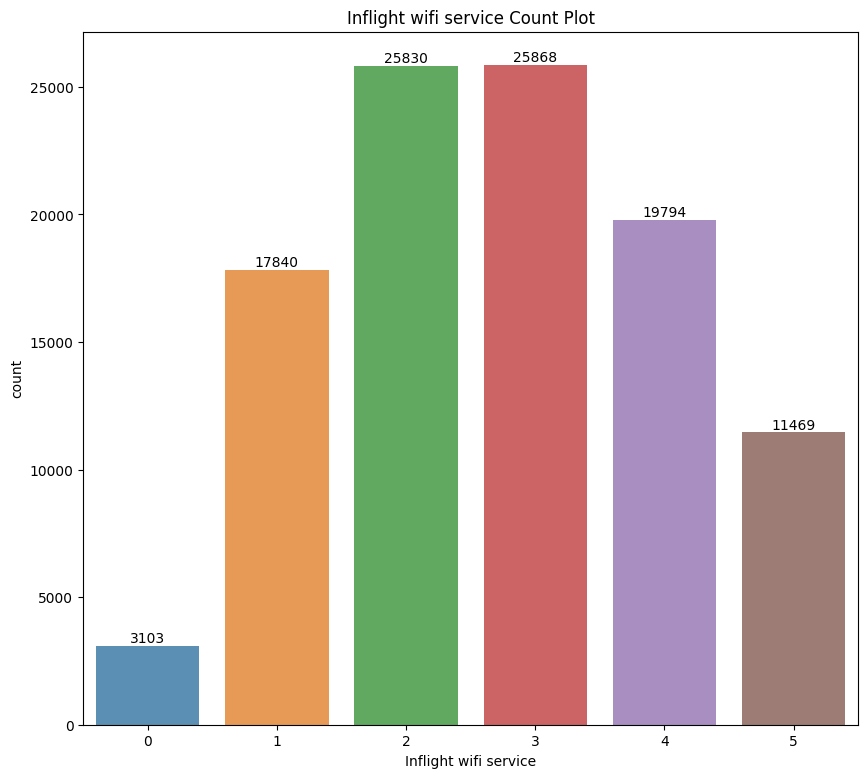

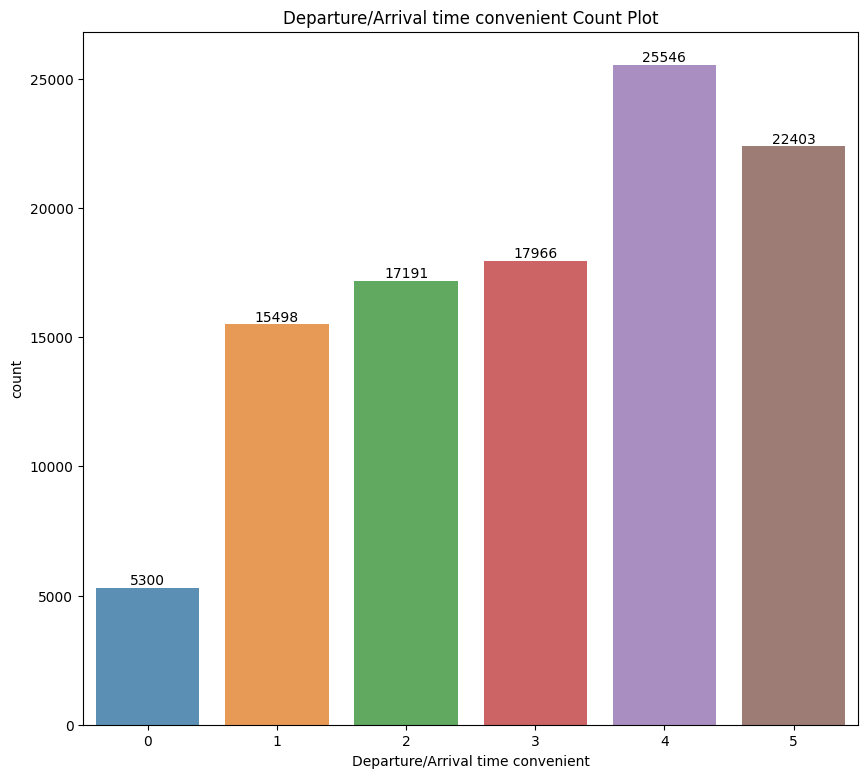

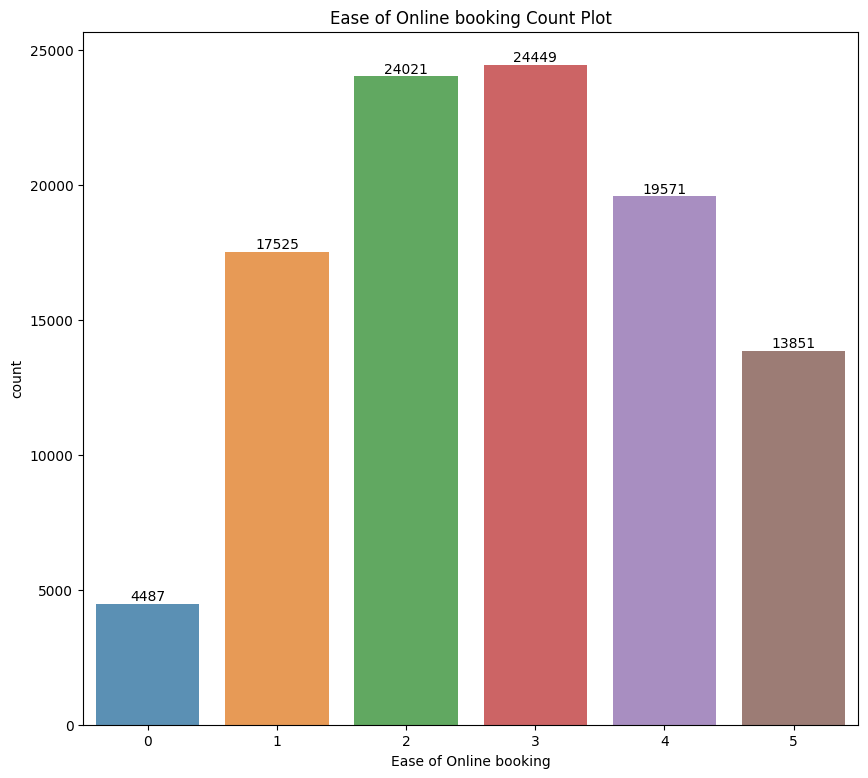

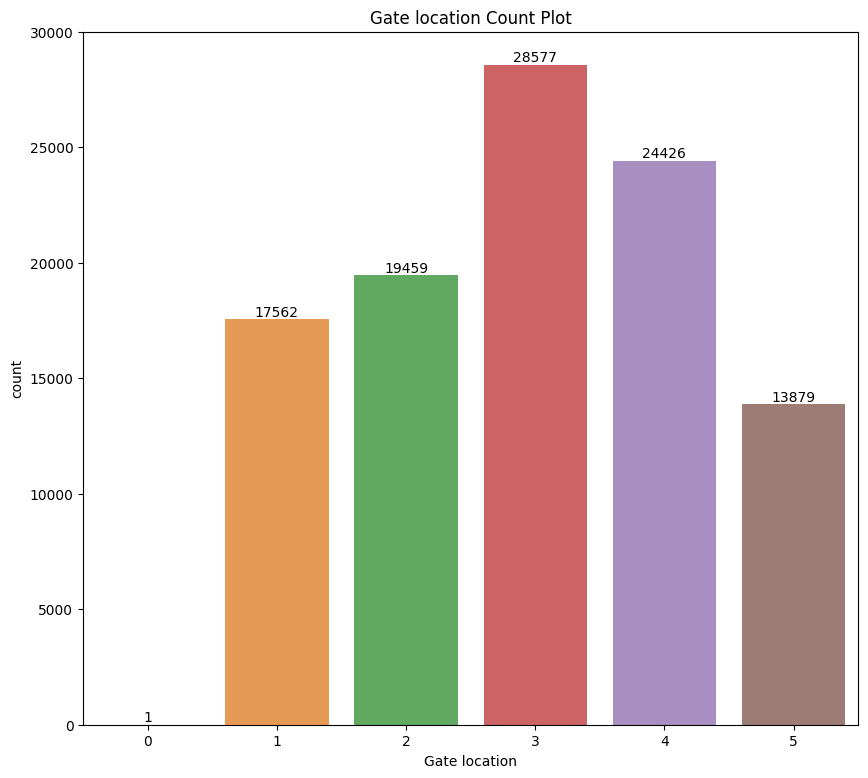

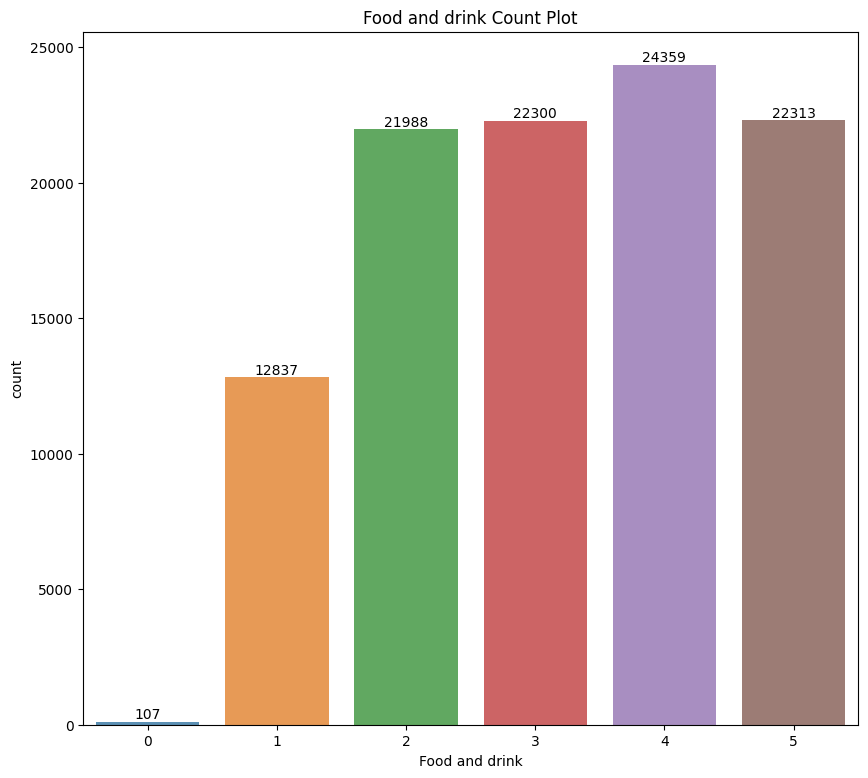

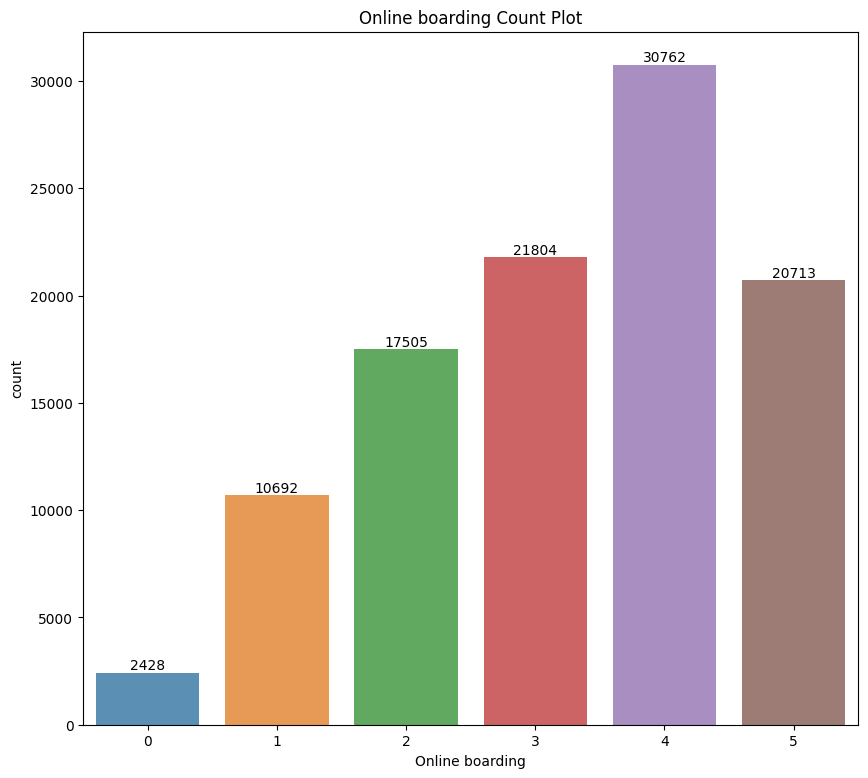

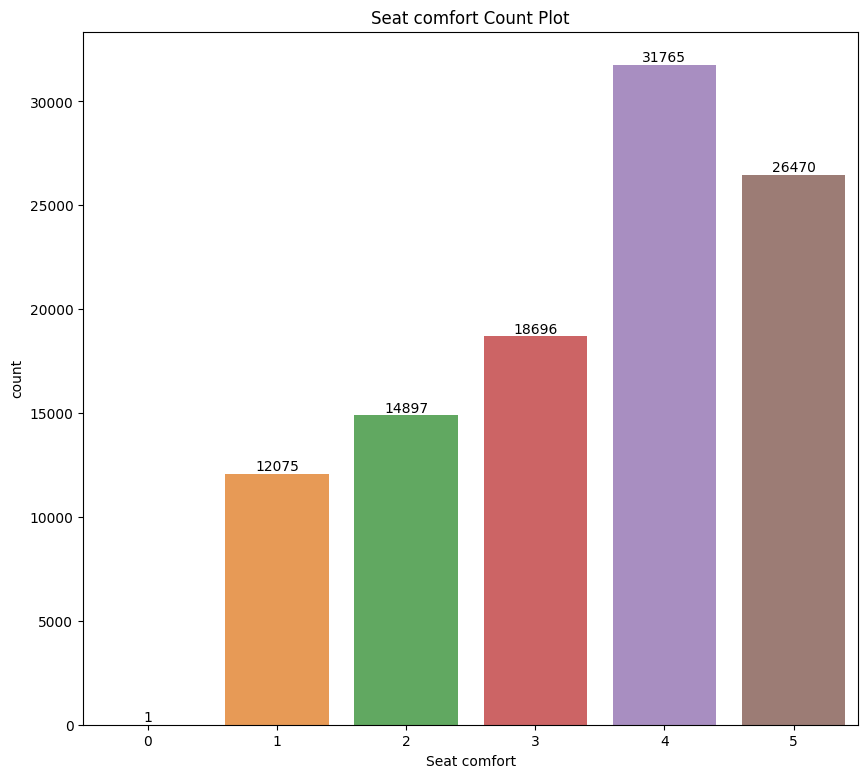

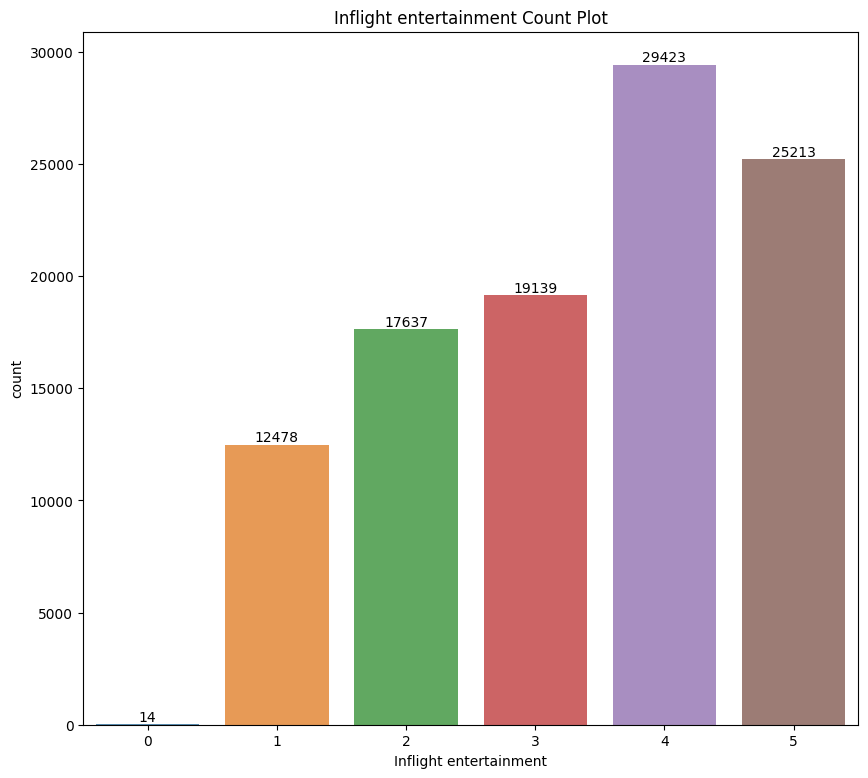

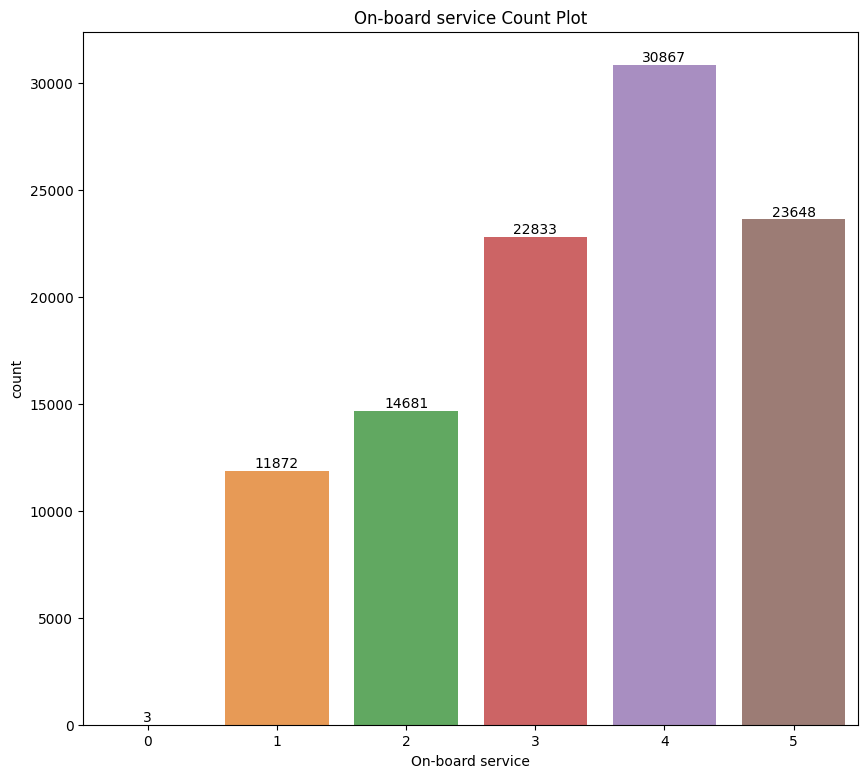

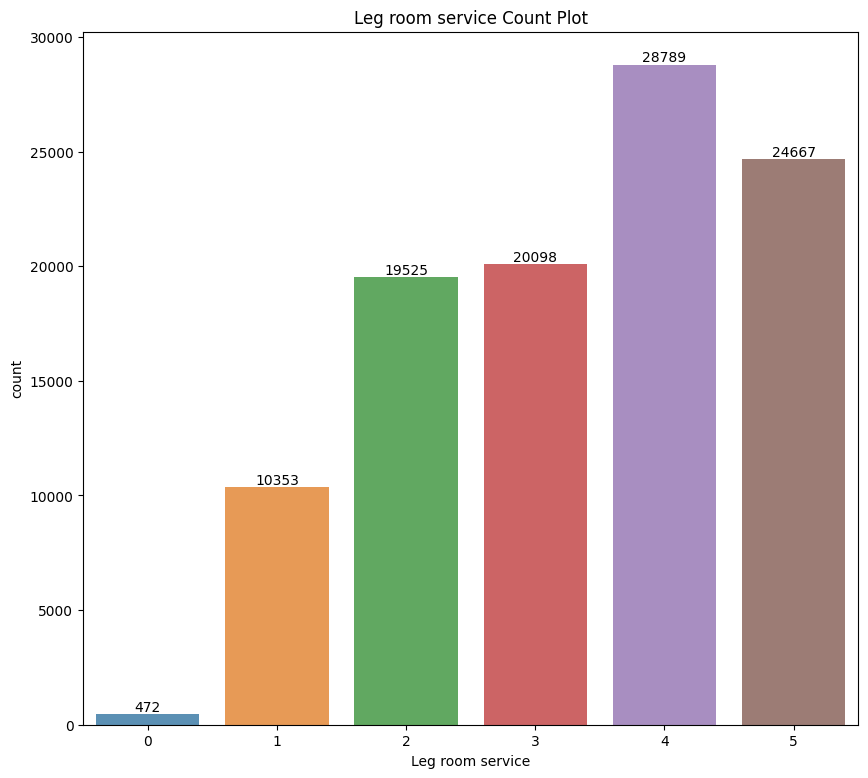

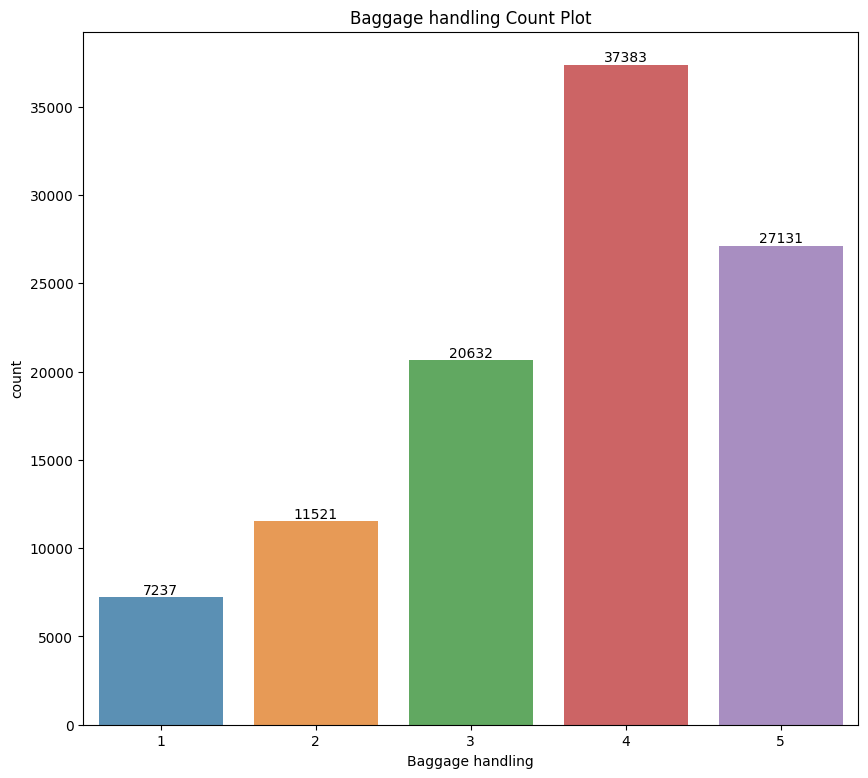

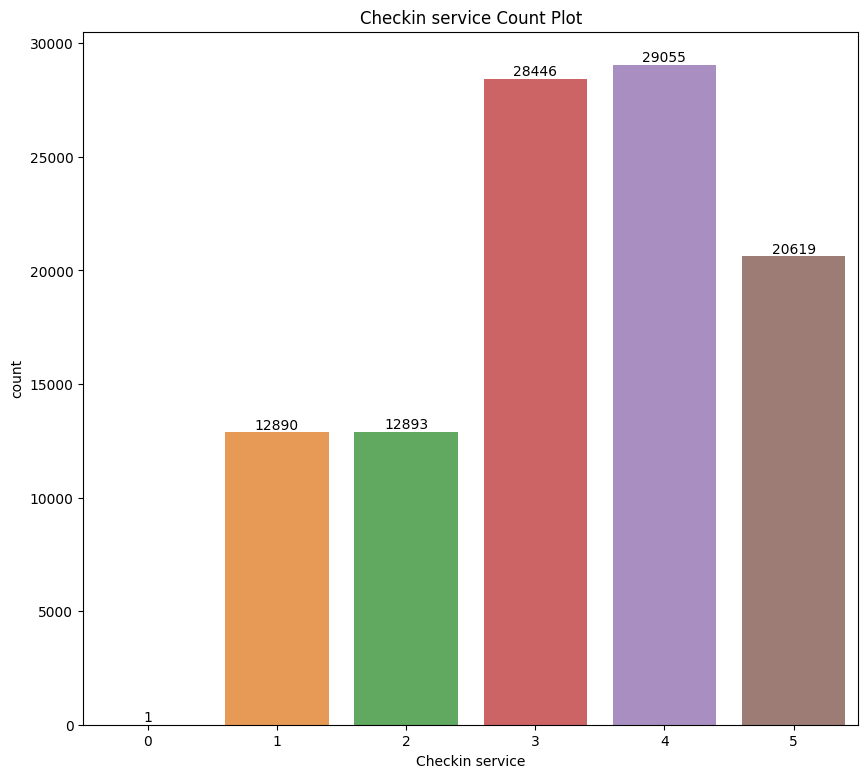

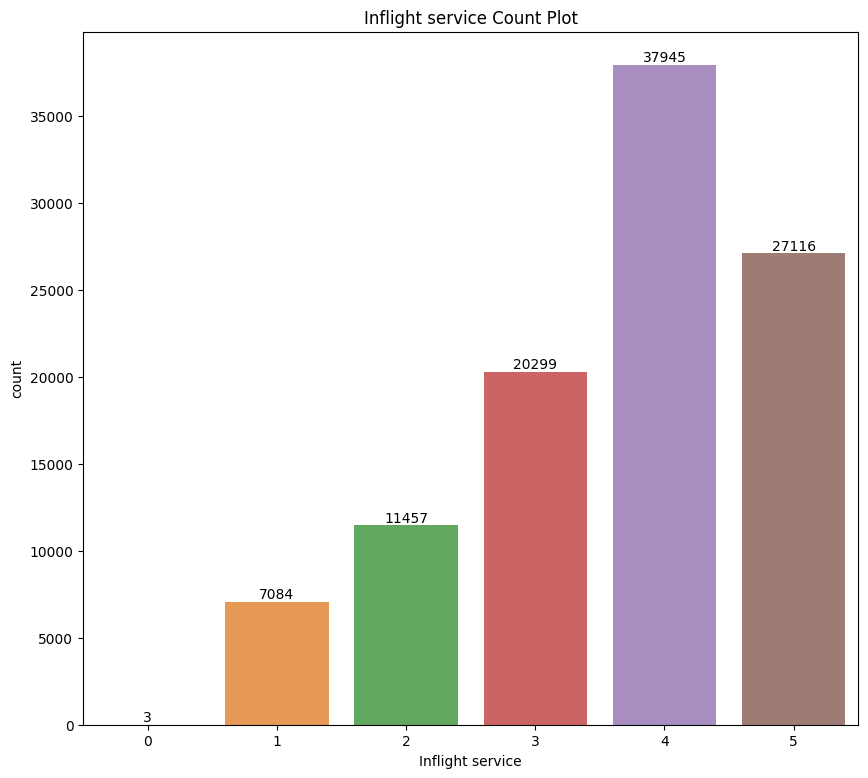

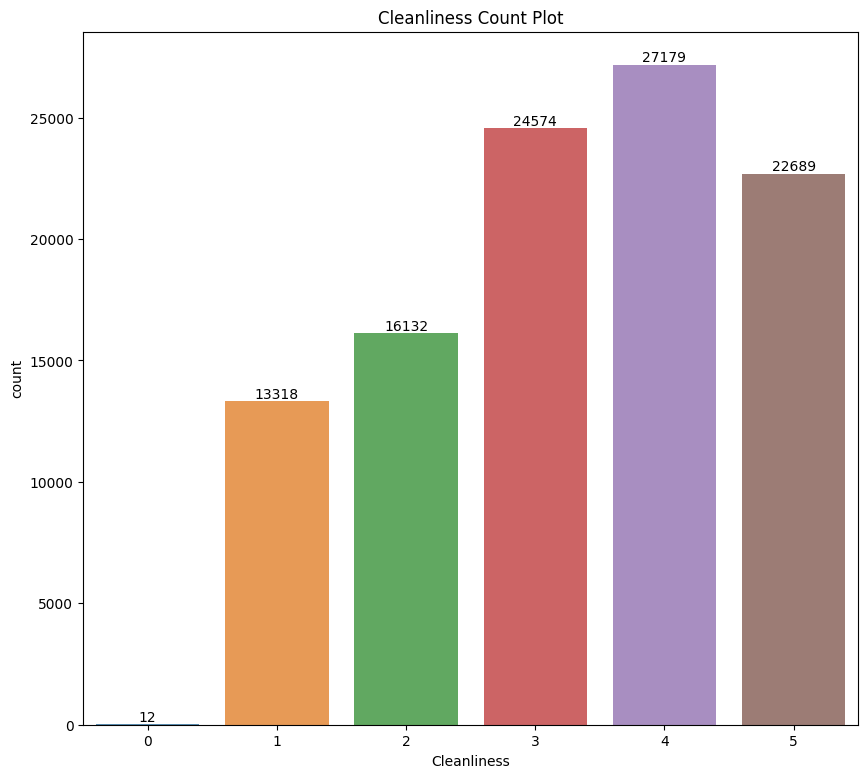

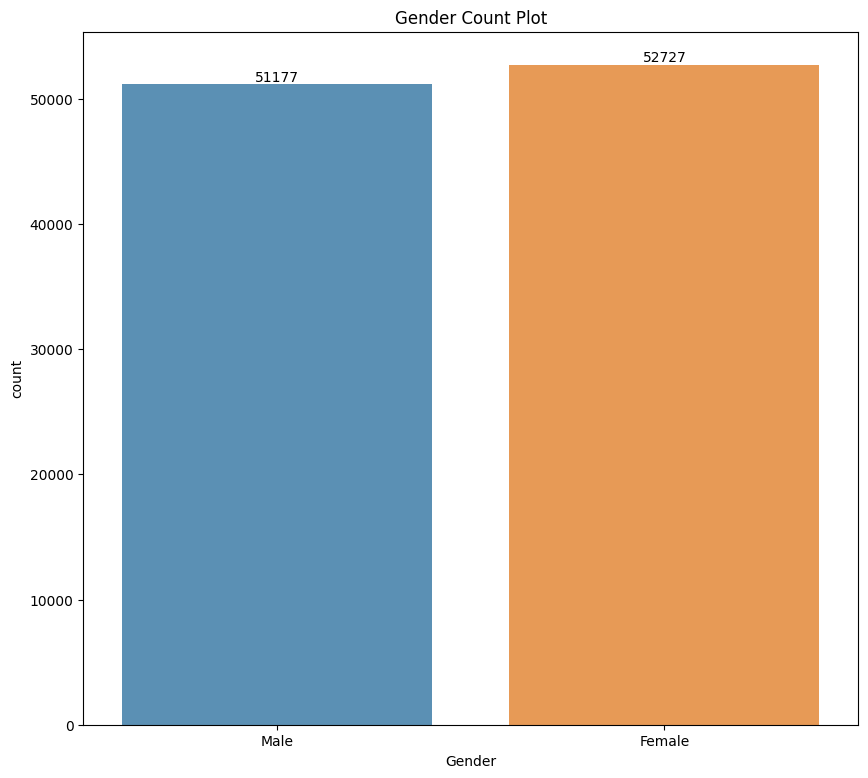

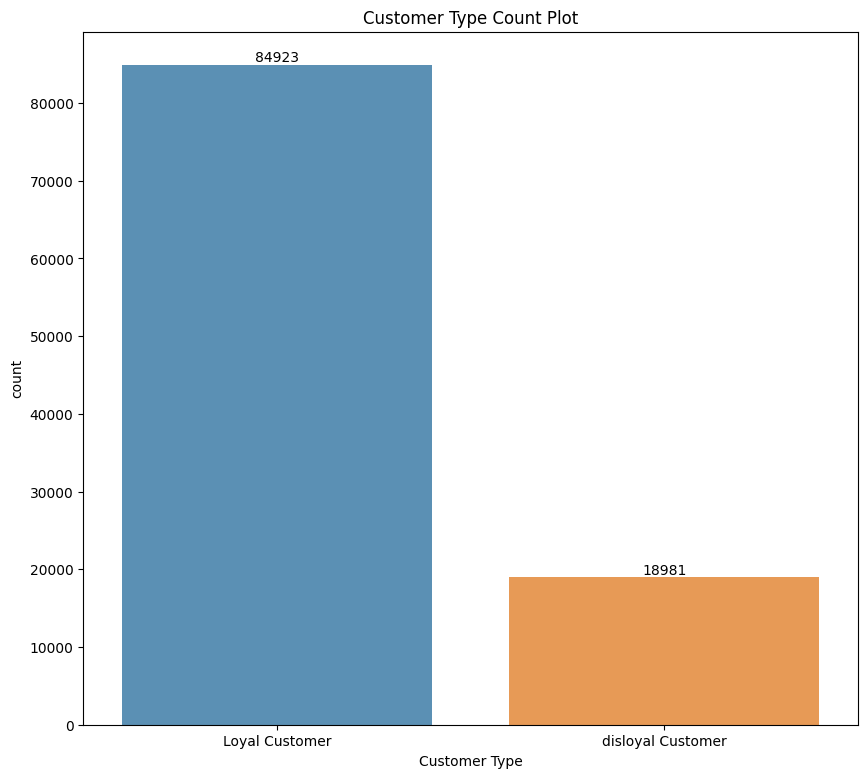

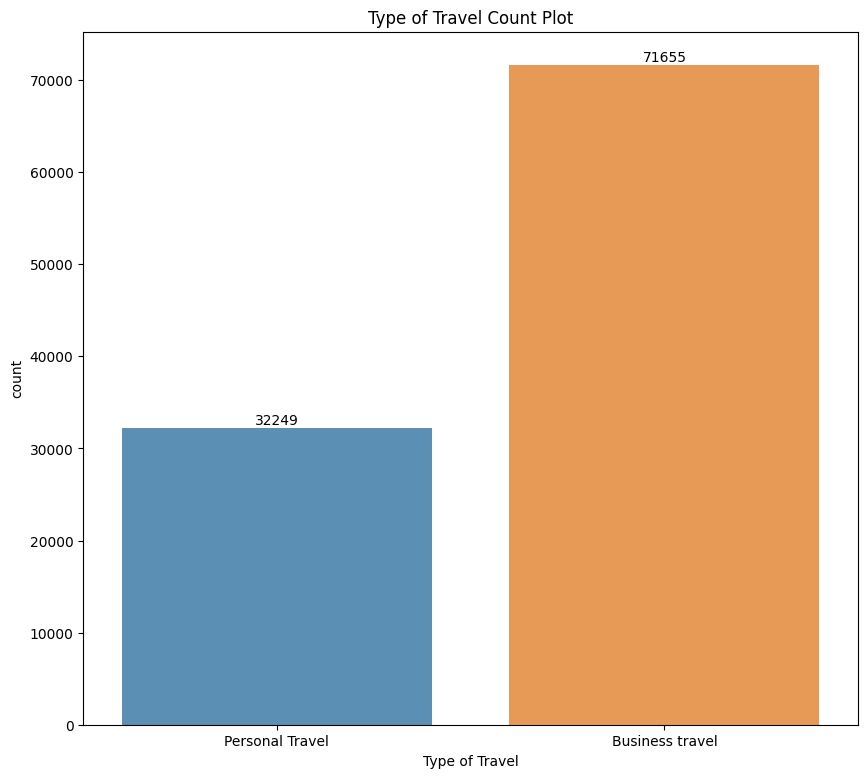

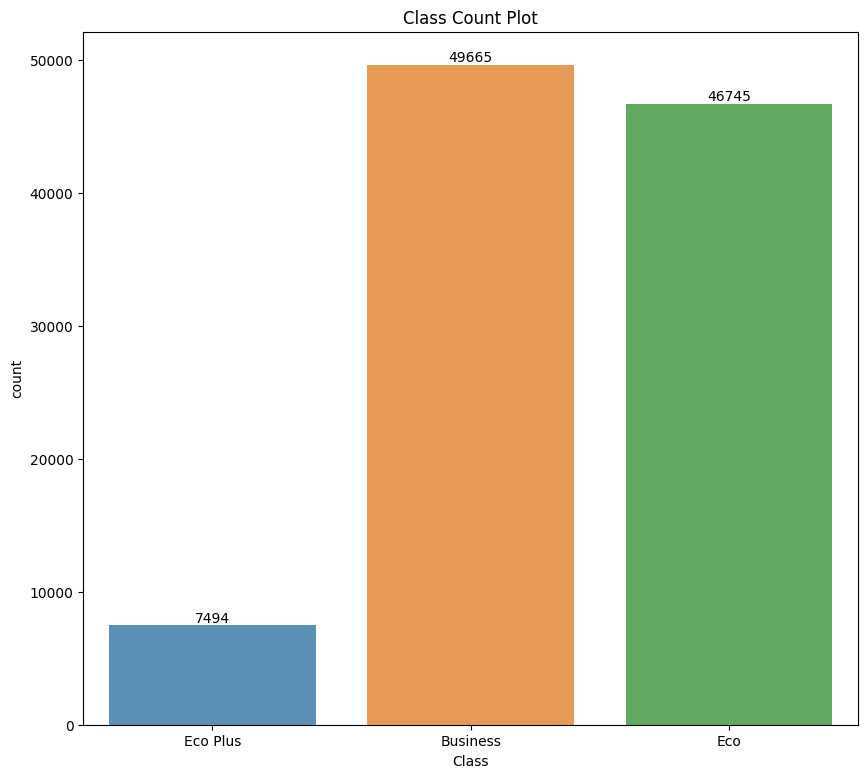

In [39]:
for cat_col in CAT_COLS:
    count_plot(cat_col)

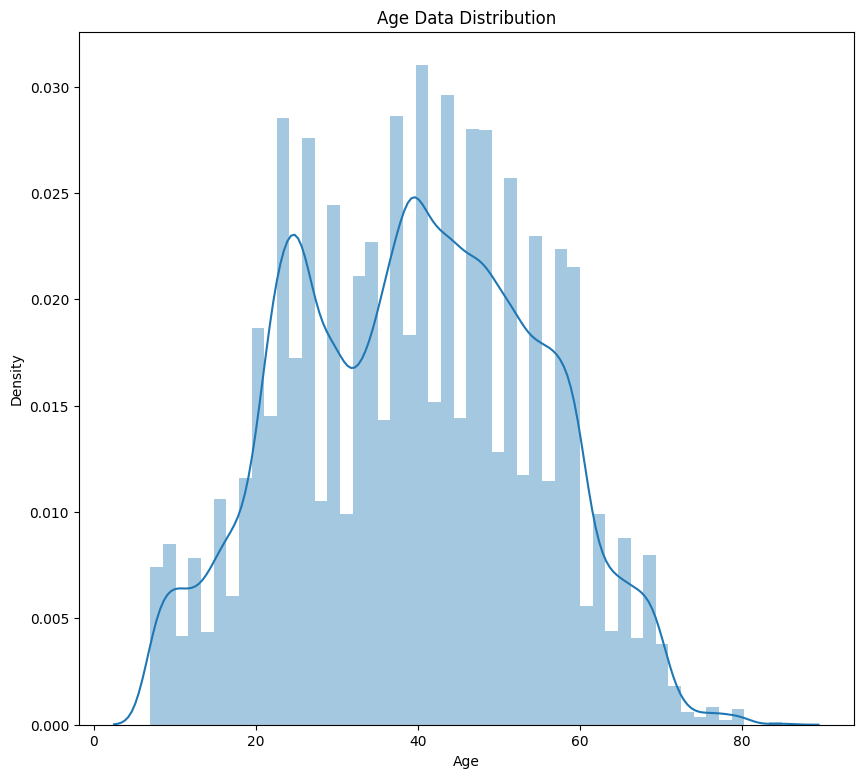

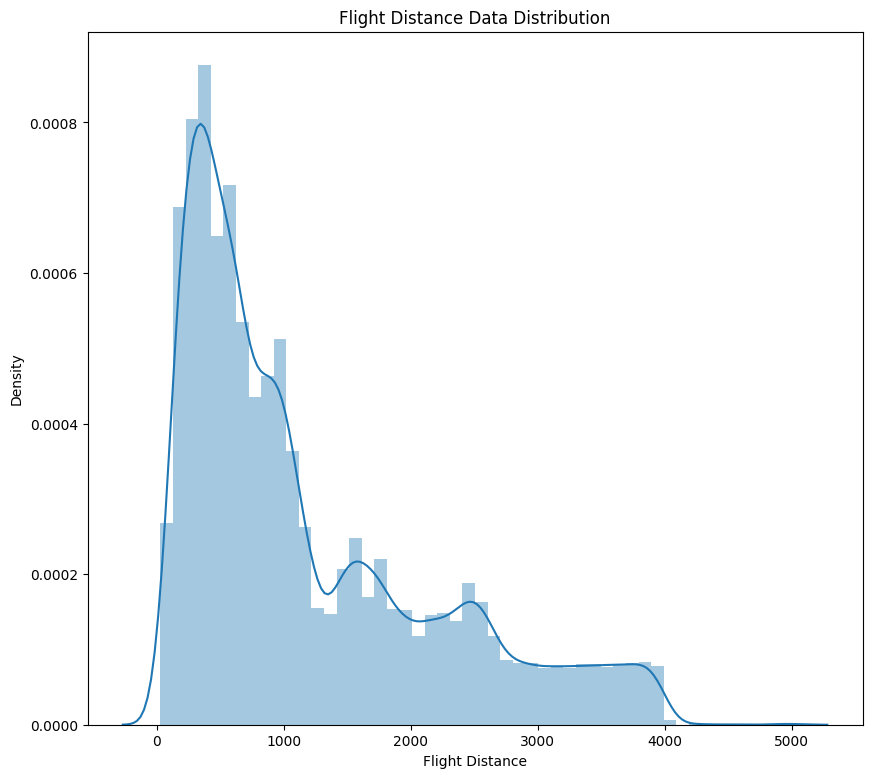

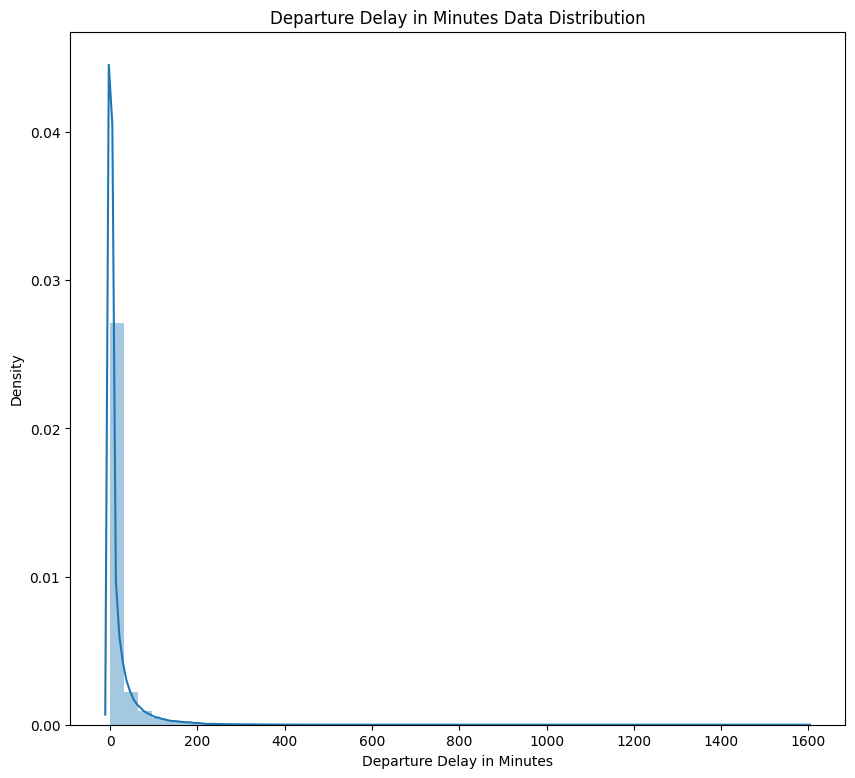

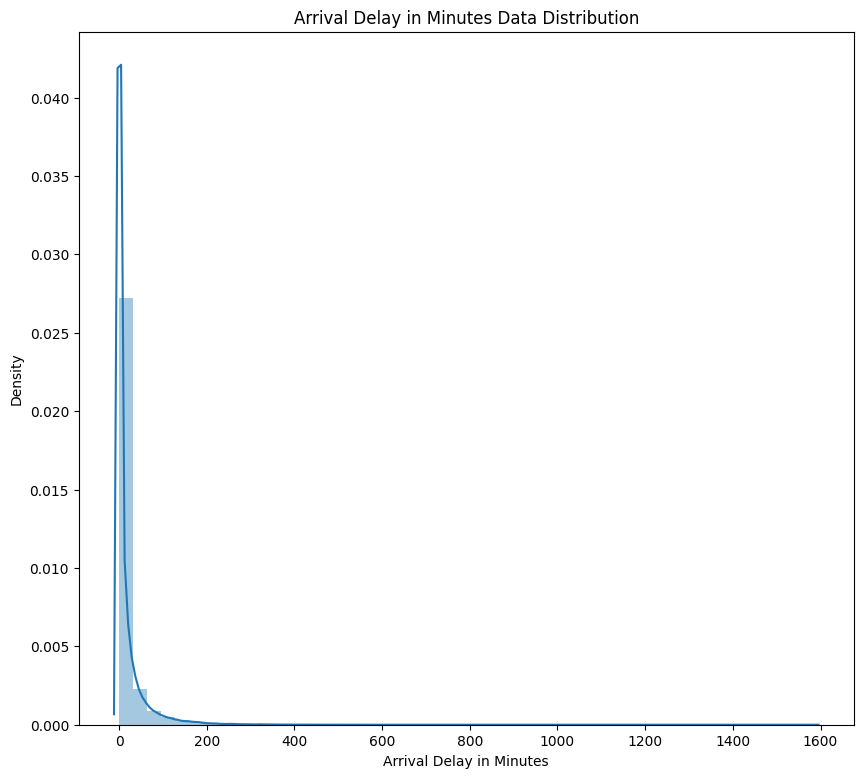

In [40]:
for num_col in NUM_COLS:
    distribution_plot(num_col)

- Apakah masuk akal jika ada rating dengan values `0`?
- Udah coba ngelakuin Pairplot tapi gak bisa, terlalu lama. udah coba di sampling tetep lemot

### Preprocessing 

#### Handling Null Values with Mean 

In [41]:
X_train_num["Arrival Delay in Minutes"][X_train_num["Arrival Delay in Minutes"].isnull() == True]

213      NaN
1124     NaN
1529     NaN
2004     NaN
2108     NaN
          ..
102067   NaN
102384   NaN
102552   NaN
102960   NaN
103540   NaN
Name: Arrival Delay in Minutes, Length: 310, dtype: float64

In [42]:
X_train_num.iloc[213]

Age                            38.0
Flight Distance               109.0
Departure Delay in Minutes     31.0
Arrival Delay in Minutes        NaN
Name: 213, dtype: float64

In [43]:
mean_value = round(np.mean(X_train_num["Arrival Delay in Minutes"]), 0)

In [44]:
X_train_num['Arrival Delay in Minutes'] = X_train_num['Arrival Delay in Minutes'].fillna(np.mean(X_train_num['Arrival Delay in Minutes']))

In [45]:
X_train_num.isnull().sum()

Age                           0
Flight Distance               0
Departure Delay in Minutes    0
Arrival Delay in Minutes      0
dtype: int64

In [46]:
X_test_num['Arrival Delay in Minutes'] = X_test_num['Arrival Delay in Minutes'].fillna(np.mean(X_train_num['Arrival Delay in Minutes']))

In [47]:
X_test_num.isnull().sum()

Age                           0
Flight Distance               0
Departure Delay in Minutes    0
Arrival Delay in Minutes      0
dtype: int64

#### One Hot Encoder

In [48]:
from sklearn.preprocessing import OneHotEncoder
import joblib

In [51]:
def transform_OHE(data, ohe_encoder):
    ohe_col = ohe_encoder.get_feature_names_out(data.columns)
    
    data_ohe = ohe_encoder.transform(data).toarray()
    data_ohe = pd.DataFrame(data = data_ohe,
                            columns = ohe_col,
                            index = data.index)
    
    return data_ohe, ohe_col

In [49]:
ohe_encoder = joblib.load("models/ohe.pkl")

In [52]:
X_train_cat_ohe, ohe_col_train = transform_OHE(data = X_train_cat,
                                         ohe_encoder = ohe_encoder)

X_test_cat_ohe, ohe_col_test = transform_OHE(data = X_test_cat,
                                        ohe_encoder = ohe_encoder)

In [53]:
X_train_cat_ohe.head()

,Inflight wifi service_0,Inflight wifi service_1,Inflight wifi service_2,Inflight wifi service_3,Inflight wifi service_4,Inflight wifi service_5,Departure/Arrival time convenient_0,Departure/Arrival time convenient_1,Departure/Arrival time convenient_2,Departure/Arrival time convenient_3,...,Cleanliness_5,Gender_Female,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0


In [54]:
X_test_cat_ohe.head()

,Inflight wifi service_0,Inflight wifi service_1,Inflight wifi service_2,Inflight wifi service_3,Inflight wifi service_4,Inflight wifi service_5,Departure/Arrival time convenient_0,Departure/Arrival time convenient_1,Departure/Arrival time convenient_2,Departure/Arrival time convenient_3,...,Cleanliness_5,Gender_Female,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0


####  StandardScaler

In [55]:
from sklearn.preprocessing import StandardScaler

In [56]:
scaler = joblib.load("models/scaler.pkl")

In [57]:
X_train_num_scaled = scaler.transform(X_train_num)
X_test_num_scaled = scaler.transform(X_test_num)

In [58]:
X_train_num_scaled = pd.DataFrame(data = X_train_num_scaled,
                                  columns = X_train_num.columns,
                                  index = X_train_num.index)

In [59]:
X_train_num_scaled

,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes
0,-1.745279,-0.731539,0.266393,0.073014
1,-0.951360,-0.957184,-0.361375,-0.237539
2,-0.885200,-0.047584,-0.387532,-0.392816
3,-0.951360,-0.629246,-0.099805,-0.159901
4,1.430397,-0.978244,-0.387532,-0.392816
...,...,...,...,...
103899,-1.083680,-1.000307,-0.309061,-0.392816
103900,0.636478,1.160869,-0.387532,-0.392816
103901,-0.620561,0.807860,-0.204433,-0.030504
103902,-1.149840,-0.189991,-0.387532,-0.392816


In [60]:
X_test_num_scaled = pd.DataFrame(data = X_test_num_scaled,
                                  columns = X_test_num.columns,
                                  index = X_test_num.index)

In [62]:
X_test_num_scaled

,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes
0,0.834958,-1.032398,0.920317,0.745879
1,-0.223601,1.678348,-0.387532,-0.392816
2,-1.282160,-1.000307,-0.387532,-0.392816
3,0.305678,2.193821,-0.387532,-0.237539
4,0.636478,-0.007470,-0.387532,0.124773
...,...,...,...,...
25971,-0.355921,-0.665350,-0.387532,-0.392816
25972,-1.083680,-0.545006,-0.387532,-0.392816
25973,-1.480640,-0.362484,-0.387532,-0.392816
25974,-1.679119,-0.062627,-0.387532,-0.392816


#### Mapping Target Class 

In [63]:
y_train.value_counts()

neutral or dissatisfied    58879
satisfied                  45025
Name: satisfaction, dtype: int64

In [64]:
def convert_target_class(y_train, y_test, class_name):
    y_train = y_train.apply(lambda x: 1 if x == class_name else 0)
    y_test = y_test.apply(lambda x: 1 if x == class_name else 0)
    
    return y_train, y_test

In [65]:
y_train, y_test = convert_target_class(y_train = y_train,
                                       y_test = y_test, 
                                       class_name = "satisfied")

In [66]:
y_train.value_counts()

0    58879
1    45025
Name: satisfaction, dtype: int64

In [67]:
y_test.value_counts()

0    14573
1    11403
Name: satisfaction, dtype: int64

### Concat Data 

In [68]:
def concat_data(data_1, data_2):
    final_data = pd.concat([data_1, data_2], axis=1)
    
    return final_data

In [69]:
X_train_final = concat_data(X_train_num_scaled, X_train_cat_ohe)

baru sadar, apakah age perlu di scaling?

In [70]:
X_train_final.head()

,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes,Inflight wifi service_0,Inflight wifi service_1,Inflight wifi service_2,Inflight wifi service_3,Inflight wifi service_4,Inflight wifi service_5,...,Cleanliness_5,Gender_Female,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus
0,-1.745279,-0.731539,0.266393,0.073014,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1,-0.951360,-0.957184,-0.361375,-0.237539,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
2,-0.885200,-0.047584,-0.387532,-0.392816,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
3,-0.951360,-0.629246,-0.099805,-0.159901,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
4,1.430397,-0.978244,-0.387532,-0.392816,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0


In [71]:
X_test_final = concat_data(X_test_num_scaled, X_test_cat_ohe)

In [72]:
X_test_final.head()

,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes,Inflight wifi service_0,Inflight wifi service_1,Inflight wifi service_2,Inflight wifi service_3,Inflight wifi service_4,Inflight wifi service_5,...,Cleanliness_5,Gender_Female,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus
0,0.834958,-1.032398,0.920317,0.745879,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1,-0.223601,1.678348,-0.387532,-0.392816,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
2,-1.282160,-1.000307,-0.387532,-0.392816,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
3,0.305678,2.193821,-0.387532,-0.237539,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
4,0.636478,-0.007470,-0.387532,0.124773,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0


### Modeling Taimu 

#### Baseline Model 

In [73]:
from sklearn.dummy import DummyClassifier

In [74]:
dummy_clf = DummyClassifier(strategy="most_frequent")

In [75]:
dummy_clf.fit(X_train_final, y_train)

DummyClassifier(strategy='most_frequent')

In [76]:
y_pred_dummy = dummy_clf.predict(X_test_final)

In [77]:
acc_test_dummy = dummy_clf.score(X_test_final, y_test)
acc_test_dummy

0.5610178626424391

#### Modeling with Logistic Regression 

In [78]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

In [79]:
logreg = LogisticRegression()

In [80]:
logreg.fit(X_train_final, y_train)

LogisticRegression()

In [81]:
y_pred_train_proba = logreg.predict_proba(X_train_final)

y_pred_train_proba

array([[0.99403705, 0.00596295],
       [0.99673144, 0.00326856],
       [0.05406239, 0.94593761],
       ...,
       [0.80666891, 0.19333109],
       [0.9799548 , 0.0200452 ],
       [0.92607439, 0.07392561]])

In [82]:
y_pred_train = logreg.predict(X_train_final)

In [83]:
y_pred_train

array([0, 0, 1, ..., 0, 0, 0])

In [84]:
acc_train = accuracy_score(y_train, y_pred_train)
acc_train

0.933958269171543

In [85]:
y_pred_test_proba = logreg.predict_proba(X_test_final)

y_pred_test_proba

array([[5.10889892e-04, 9.99489110e-01],
       [2.60103828e-02, 9.73989617e-01],
       [9.98840256e-01, 1.15974383e-03],
       ...,
       [9.98909359e-01, 1.09064064e-03],
       [6.00083982e-02, 9.39991602e-01],
       [9.99912846e-01, 8.71538566e-05]])

In [86]:
y_pred_test = logreg.predict(X_test_final)

In [87]:
acc_test = accuracy_score(y_test, y_pred_test)
acc_test

0.9323221435170927

In [88]:
print(f"Logistic Regression training accuracy {acc_train}")
print(f"Logistic Regression test accuracy {acc_test}")

Logistic Regression training accuracy 0.933958269171543
Logistic Regression test accuracy 0.9323221435170927


In [89]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94     14573
           1       0.93      0.91      0.92     11403

    accuracy                           0.93     25976
   macro avg       0.93      0.93      0.93     25976
weighted avg       0.93      0.93      0.93     25976



#### Cross Validation and Hyperparameter Tuning 

In [90]:
from sklearn.model_selection import RandomizedSearchCV, KFold

In [91]:
k_folds = KFold(n_splits = 3)

In [105]:
PARAMS = {
    "penalty": ['l1', 'l2'],
    "C": np.linspace(0.5, 10, 5),
    "solver": ["linear", "saga"],
    "max_iter": [250, 500, 1000, 5000]
}

Utak atik params nya nanti

In [106]:
PARAMS

{'penalty': ['l1', 'l2'],
 'C': array([ 0.5  ,  2.875,  5.25 ,  7.625, 10.   ]),
 'solver': ['linear', 'saga'],
 'max_iter': [250, 500, 1000, 5000]}

#### RandomizedSearch

In [107]:
best_logreg_random = RandomizedSearchCV(estimator = logreg,
                                        param_distributions = PARAMS,
                                        cv = k_folds, 
                                        verbose = 3)

Nanti coba di laptop pribadi, lama cuy wkwk

In [108]:
best_logreg_random.fit(X_train_final, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV 1/3] END C=0.5, max_iter=5000, penalty=l2, solver=saga;, score=0.932 total time= 1.7min
[CV 2/3] END C=0.5, max_iter=5000, penalty=l2, solver=saga;, score=0.933 total time= 1.2min
[CV 3/3] END C=0.5, max_iter=5000, penalty=l2, solver=saga;, score=0.935 total time=  59.8s
[CV 1/3] END C=5.25, max_iter=5000, penalty=l2, solver=saga;, score=0.933 total time= 2.0min
[CV 2/3] END C=5.25, max_iter=5000, penalty=l2, solver=saga;, score=0.933 total time= 2.5min
[CV 3/3] END C=5.25, max_iter=5000, penalty=l2, solver=saga;, score=0.935 total time= 1.7min
[CV 1/3] END C=5.25, max_iter=250, penalty=l2, solver=saga;, score=0.932 total time=  20.4s
[CV 2/3] END C=5.25, max_iter=250, penalty=l2, solver=saga;, score=0.933 total time=  20.5s
[CV 3/3] END C=5.25, max_iter=250, penalty=l2, solver=saga;, score=0.935 total time=  20.6s
[CV 1/3] END C=2.875, max_iter=500, penalty=l2, solver=saga;, score=0.932 total time=  40.7s
[CV 2/3] END C=

RandomizedSearchCV(cv=KFold(n_splits=3, random_state=None, shuffle=False),
                   estimator=LogisticRegression(),
                   param_distributions={'C': array([ 0.5  ,  2.875,  5.25 ,  7.625, 10.   ]),
                                        'max_iter': [250, 500, 1000, 5000],
                                        'penalty': ['l1', 'l2'],
                                        'solver': ['linear', 'saga']},
                   verbose=3)

In [109]:
best_logreg_random.best_params_

{'solver': 'saga', 'penalty': 'l1', 'max_iter': 5000, 'C': 10.0}

In [110]:
best_logreg_random.best_score_

0.933727304035262

In [111]:
y_pred_test_random = best_logreg_random.predict(X_test_final)

In [112]:
acc_test_random = accuracy_score(y_test, y_pred_test_random)
acc_test_random

0.9322836464428703

In [113]:
print(classification_report(y_test, y_pred_test_random))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94     14573
           1       0.93      0.91      0.92     11403

    accuracy                           0.93     25976
   macro avg       0.93      0.93      0.93     25976
weighted avg       0.93      0.93      0.93     25976



In [114]:
result_data = {
    "baseline": acc_test_dummy,
    "logreg_vanilla": acc_test,
    "logreg_random": acc_test_random
}

In [115]:
result_data

{'baseline': 0.5610178626424391,
 'logreg_vanilla': 0.9323221435170927,
 'logreg_random': 0.9322836464428703}

In [116]:
data = pd.Series(result_data).to_frame("Result")

data

,Result
baseline,0.561018
logreg_vanilla,0.932322
logreg_random,0.932284
